In [811]:
import numpy as np
import matplotlib.pyplot as plt

In [812]:
T = 100
n = 10
alpha = 0.9
beta = 0.2
gamma = 0.1
Lambda = [1,5]
cpd_z = [1-alpha,alpha,0.5]
Gamma = np.array(
    [
        [1-gamma,0,gamma],
        [0,1-gamma,gamma],
        [beta/2,beta/2,1-beta]
    ]
)



In [813]:
# Since numpy doesn't have built in support for categorical distribution
def categorical(distribution: np.array):
    # returns the result of a single sample drawn from a binomial distribution <distribution> 
    sample = np.random.multinomial(1,distribution)
    res = np.where(sample)[0][0]
    return res

In [814]:
# Simulate

C = np.zeros(T,dtype='int32')
Z = np.zeros((T,n),dtype='int32')
X = np.zeros((T,n),dtype='int32')
C[0] = 2
for t in range(T):
    if t == 0:
        pass
    else:
        C[t] = categorical(Gamma[C[t-1]])
    Z[t] = np.random.binomial(1,cpd_z[C[t]],size=n)
    for i in range(n):
        X[t][i] = np.random.poisson(Lambda[Z[t][i]])

    


Text(0.5, 0, 't')

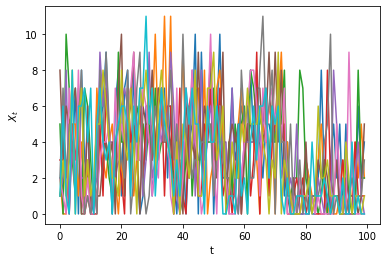

In [815]:
for i in range(n):
    plt.plot(X[0:,i])
plt.ylabel(r'$X_{t}$')
plt.xlabel('t')


In [816]:
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0).fit(X,C)


In [817]:
C

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [818]:
coin = lambda p, size=None: np.random.binomial(1, p, size=size)
poisson = lambda p, x : np.exp(-p)*(p**x)/np.math.factorial(x)

px = np.array([[poisson(p_,x_) for p_ in (1,5)] for x_ in range(20)])
px

T = 100
n = 10
alpha = 0.9
beta = 0.2
gamma = 0.1
Lambda = [1,5]
cpd_z = np.array([
    [alpha, 1-alpha],
    [1-alpha,     alpha],
    [0.5, 0.5]
    ])

Gamma = np.array(
    [
        [1-gamma,0,gamma],
        [0,1-gamma,gamma],
        [beta/2,beta/2,1-beta]
    ]
)

In [865]:
%%latex
$$\psi^t = \psi(C^t,C^{t+1}) = P(C^{t+1}|C^t) = \Gamma $$
$$\phi_i^t = \sum_{Z_i^t}\psi(C^t,Z_i^t,X_i^t) = \sum{Z_i^t}P(Z_i^t|C^t)P(x_i^t|Z_i^t)$$
$$\tau^t = \sum_{C^{t-i}} \psi^{t-1}\tau^{t-1}\prod_{i=1}^n \phi_i^{t-1}$$
$$\tau_0 = P(C_0) = [0,0,1]$$
$$\theta^t = \psi^{t-1}\tau^{t-1}\prod_{i=1}^n \phi_i^{t-1}$$

<IPython.core.display.Latex object>

In [873]:
c = np.zeros(T)

taus = np.zeros((T,3))
tau = np.array([0,0,1])
taus[0] = tau
thetas = np.zeros((T,3,3))


for t in range(1,T):
    # multiply incoming messages (phi)
    phi = 1
    for i in range(0,n):
        phi *= px[X[t][i]]
    # this step is equivalent to marginalizing
    phi = cpd_z @ phi
    # calculate theta and store
    theta = Gamma * tau * phi
    thetas[t] = theta
    # calculate 
    tau = 
    


In [874]:
thetas

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 2.36410948e-14],
        [0.00000000e+00, 0.00000000e+00, 2.36410948e-14],
        [0.00000000e+00, 0.00000000e+00, 1.89128759e-13]],

       [[0.00000000e+00, 0.00000000e+00, 4.44047711e-16],
        [0.00000000e+00, 0.00000000e+00, 4.44047711e-16],
        [0.00000000e+00, 0.00000000e+00, 3.55238169e-15]],

       [[0.00000000e+00, 0.00000000e+00, 1.77618740e-14],
        [0.00000000e+00, 0.00000000e+00, 1.77618740e-14],
        [0.00000000e+00, 0.00000000e+00, 1.42094992e-13]],

       [[0.00000000e+00, 0.00000000e+00, 1.02111314e-10],
        [0.00000000e+00, 0.00000000e+00, 1.02111314e-10],
        [0.00000000e+00, 0.00000000e+00, 8.16890512e-10]],

       [[0.00000000e+00, 0.00000000e+00, 2.02637956e-15],
        [0.00000000e+00, 0.00000000e+00, 2.02637956e-15],
    

In [820]:
c = np.zeros(T)

sigma = np.array([0,0,1])
sigmas = np.zeros((T,3))
clusters = np.zeros((T,3))


for t in range(1,T):
    # matrix multiplication counts as elementwise multiplication and marginalization
    tau = Gamma @ sigma 
    # calculate product of phis
    phi = 1
    for i in range(n):
        phi *= px[X[t][i]]
    cluster = cpd_z @ phi 
    # cache the product of CPD(C_t|C_t-1) and all the phis
    clusters[t] = cluster
    # calculate sigma
    sigma = tau * cluster
    c[t] = sigma.sum()
    # normalise 
    sigma /= c[t]
    sigmas[t] = sigma



In [821]:
sigmas[T-1][C[T-1]]

0.8874045148093525

In [835]:
# backward pass
cpd_c = np.zeros((T,3))
cpd_c[0] = [0,0,1]
cpd_c[T-1] = sigmas[T-1]


for t in range(T-2,0,-1):
    tau_bar = cpd_c[t+1] 
    sigma_bar = tau_bar * clusters[t] * sigmas[t]
    sigma_bar /= sigma_bar.sum()
    cpd_c[t] = sigma_bar


In [839]:
tau_bar

array([2.39144659e-128, 2.40880881e-013, 1.00000000e+000])

In [837]:
sigmas

array([[0.        , 0.        , 0.        ],
       [0.02490005, 0.17509995, 0.8       ],
       [0.01848347, 0.38592579, 0.59559074],
       [0.01205073, 0.57917929, 0.40876998],
       [0.00734523, 0.71847309, 0.27418168],
       [0.00572262, 0.79711601, 0.19716137],
       [0.0031681 , 0.84521228, 0.15161961],
       [0.00224287, 0.86942659, 0.12833054],
       [0.07104743, 0.424261  , 0.50469157],
       [0.01824325, 0.6203763 , 0.36138045],
       [0.16700533, 0.20989031, 0.62310436],
       [0.39490085, 0.05184311, 0.55325604],
       [0.10913405, 0.24376889, 0.64709706],
       [0.02970642, 0.4661918 , 0.50410178],
       [0.01173975, 0.64368005, 0.34458021],
       [0.00618885, 0.75930473, 0.23450642],
       [0.00376343, 0.82495719, 0.17127938],
       [0.09031581, 0.37182695, 0.53785724],
       [0.02246324, 0.58133951, 0.39619725],
       [0.00853352, 0.7223988 , 0.26906769],
       [0.004569  , 0.80497485, 0.19045615],
       [0.00293825, 0.84904394, 0.1480178 ],
       [0.

In [864]:
px

array([[3.67879441e-01, 6.73794700e-03],
       [3.67879441e-01, 3.36897350e-02],
       [1.83939721e-01, 8.42243375e-02],
       [6.13132402e-02, 1.40373896e-01],
       [1.53283100e-02, 1.75467370e-01],
       [3.06566201e-03, 1.75467370e-01],
       [5.10943668e-04, 1.46222808e-01],
       [7.29919526e-05, 1.04444863e-01],
       [9.12399408e-06, 6.52780393e-02],
       [1.01377712e-06, 3.62655774e-02],
       [1.01377712e-07, 1.81327887e-02],
       [9.21615563e-09, 8.24217669e-03],
       [7.68012969e-10, 3.43424029e-03],
       [5.90779207e-11, 1.32086165e-03],
       [4.21985148e-12, 4.71736303e-04],
       [2.81323432e-13, 1.57245434e-04],
       [1.75827145e-14, 4.91391982e-05],
       [1.03427732e-15, 1.44527054e-05],
       [5.74598513e-17, 4.01464038e-06],
       [3.02420270e-18, 1.05648431e-06]])